Student : Arora, Sanjana (V00966221)


> Problem 1



In [ ]:
import numpy as np
import random
np.random.seed(1337)
random.seed(1337)

In [ ]:
# Plotting support
from matplotlib import pyplot as plt
from plotnine import *
# Standard libraries
import pandas as pd
import sklearn as sk

In [ ]:
!wget https://raw.githubusercontent.com/kkehoe1985/ga_data_science_final_project/master/combined_data.csv

--2021-06-05 08:14:17--  https://raw.githubusercontent.com/kkehoe1985/ga_data_science_final_project/master/combined_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1882495 (1.8M) [text/plain]
Saving to: ‘combined_data.csv’

combined_data.csv   100%[===================>]   1.79M  --.-KB/s    in 0.09s   

2021-06-05 08:14:17 (20.9 MB/s) - ‘combined_data.csv’ saved [1882495/1882495]



In [ ]:
!ls

combined_data.csv  sample_data


In [ ]:
df = pd.read_csv("combined_data.csv")


In [ ]:
df.describe()

,fips,votes,"Percent of adults with less than a high school diploma, 2011-2015","Percent of adults with a high school diploma only, 2011-2015","Percent of adults completing some college or associate's degree, 2011-2015","Percent of adults with a bachelor's degree or higher, 2011-2015",Unemployment_rate_2015,POP_ESTIMATE_2015,Amish,Buddhist,Catholic,Christian Generic,Eastern Orthodox,Hindu,Jewish,Mainline Christian,Mormon,Muslim,Non-Catholic Christian,Other,Other Christian,Other Misc,Pentecostal / Charismatic,Protestant Denomination,Zoroastrian,MedHHInc2014,PerCapitaInc,PovertyUnder18Pct2014,PovertyAllAgesPct2014,Deep_Pov_All,Deep_Pov_Children,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units,age_total_pop,0-4_rate,5-9_rate,10-14_rate,15-19_rate,20-24_rate,25-29_rate,30-34_rate,35-39_rate,40-44_rate,45-49_rate,50-54_rate,55-59_rate,60-64_rate,65-69_rate,70-74_rate,75-79_rate,80-84_rate,85+_rate,TOT_MALE_rate,TOT_FEMALE_rate,WHITE_MALE_rate,WHITE_FEMALE_rate,BLACK_MALE_rate,BLACK_FEMALE_rate,NATIVE_AMERICAN_MALE_rate,NATIVE_AMERICAN_FEMALE_rate,ASIAN_MALE_rate,ASIAN_FEMALE_rate,HAWAIIAN_PACIFIC_MALE_rate,HAWAIIAN_PACIFIC_FEMALE_rate,MULTI_MALE_rate,MULTI_FEMALE_rate,WHITE_rate,BLACK_rate,NATIVE_AMERICAN_rate,HAWAIIAN_PACIFIC_rate,MULTI_rate,voter_turnout_rate,Democrat
count,3145.000000,3.145000e+03,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3.145000e+03,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.0,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3.145000e+03,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3.145000e+03,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.0,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.0,3145.000000,3145.000000,3145.000000,3145.0,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000
mean,30352.751669,4.025041e+04,14.569824,34.743268,30.264624,20.421776,5.535792,1.036771e+05,1.659777,0.700795,247.871860,362.791733,0.316693,0.502067,1.109380,144.850556,21.489030,2.167250,134.508108,27.797456,19.109062,35.196820,20.586328,2.367250,0.0,47144.571906,24062.586515,23.655656,16.831301,7.058205,10.379254,4.255573e+04,1208.466838,84.329032,1124.137736,262.168150,114.631276,1.141095e+05,0.058680,0.062520,0.062520,0.064559,0.064699,0.058772,0.058812,0.057235,0.057939,0.061379,0.071018,0.073149,0.067364,0.0,0.044014,0.031977,0.022531,0.023055,0.500346,0.499453,0.425978,0.425443,0.047399,0.046237,0.009983,0.009881,0.006843,0.0,0.000595,0.000538,0.009547,0.0,0.851421,0.093636,0.019864,0.001133,0.009547,0.450261,0.154531
std,15185.961137,1.061758e+05,6.637558,7.074960,5.170318,9.019258,2.022568,3.312062e+05,10.291242,4.690194,270.440588,190.413926,1.425925,3.401758,8.584974,118.302586,85.327538,10.477985,153.236112,86.548480,32.597727,42.692466,21.455253,5.212984,0.0,12097.021022,5702.048515,8.924231,6.427022,3.349625,5.987177,1.236830e+05,3826.247607,469.822414,3610.118494,1725.093685,823.631380,3.459185e+05,0.011820,0.010486,0.010486,0.011253,0.023930,0.012783,0.009612,0.007832,0.007842,0.007653,0.007763,0.009587,0.012106,0.0,0.011991,0.009093,0.006896,0.008718,0.022149,0.022076,0.079507,0.080208,0.069693,0.075330,0.031843,0.033184,0.012756,0.0,0.002116,0.001980,0.006787,0.0,0.157047,0.143735,0.064968,0.004067,0.006787,0.325422,0.361514
min,1001.000000,6.400000e+01,1.600000,7.500000,11.400000,1.900000,1.800000,1.120000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [ ]:
col = df.columns
print('Number of columns :', len(col))
df.columns

Number of columns : 78


Index(['fips', 'votes',
       'Percent of adults with less than a high school diploma, 2011-2015',
       'Percent of adults with a high school diploma only, 2011-2015',
       'Percent of adults completing some college or associate's degree, 2011-2015',
       'Percent of adults with a bachelor's degree or higher, 2011-2015',
       'Unemployment_rate_2015', 'POP_ESTIMATE_2015', 'Amish', 'Buddhist',
       'Catholic', 'Christian Generic', 'Eastern Orthodox', 'Hindu', 'Jewish',
       'Mainline Christian', 'Mormon', 'Muslim', 'Non-Catholic Christian',
       'Other', 'Other Christian', 'Other Misc', 'Pentecostal / Charismatic',
       'Protestant Denomination', 'Zoroastrian', 'MedHHInc2014',
       'PerCapitaInc', 'PovertyUnder18Pct2014', 'PovertyAllAgesPct2014',
       'Deep_Pov_All', 'Deep_Pov_Children', 'Population', 'Housing units',
       'Area in square miles - Total area',
       'Area in square miles - Water area', 'Area in square miles - Land area',
       'Density per square

In [ ]:
df.head()

,fips,votes,"Percent of adults with less than a high school diploma, 2011-2015","Percent of adults with a high school diploma only, 2011-2015","Percent of adults completing some college or associate's degree, 2011-2015","Percent of adults with a bachelor's degree or higher, 2011-2015",Unemployment_rate_2015,POP_ESTIMATE_2015,Amish,Buddhist,Catholic,Christian Generic,Eastern Orthodox,Hindu,Jewish,Mainline Christian,Mormon,Muslim,Non-Catholic Christian,Other,Other Christian,Other Misc,Pentecostal / Charismatic,Protestant Denomination,Zoroastrian,MedHHInc2014,PerCapitaInc,PovertyUnder18Pct2014,PovertyAllAgesPct2014,Deep_Pov_All,Deep_Pov_Children,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units,age_total_pop,0-4_rate,5-9_rate,10-14_rate,15-19_rate,20-24_rate,25-29_rate,30-34_rate,35-39_rate,40-44_rate,45-49_rate,50-54_rate,55-59_rate,60-64_rate,65-69_rate,70-74_rate,75-79_rate,80-84_rate,85+_rate,TOT_MALE_rate,TOT_FEMALE_rate,WHITE_MALE_rate,WHITE_FEMALE_rate,BLACK_MALE_rate,BLACK_FEMALE_rate,NATIVE_AMERICAN_MALE_rate,NATIVE_AMERICAN_FEMALE_rate,ASIAN_MALE_rate,ASIAN_FEMALE_rate,HAWAIIAN_PACIFIC_MALE_rate,HAWAIIAN_PACIFIC_FEMALE_rate,MULTI_MALE_rate,MULTI_FEMALE_rate,WHITE_rate,BLACK_rate,NATIVE_AMERICAN_rate,HAWAIIAN_PACIFIC_rate,MULTI_rate,voter_turnout_rate,Democrat
0,2013,7471,18.3,39.4,28.2,14.0,3.2,3341.0,0,0,190,42,0,0,0,0,0,0,42,2,0,193,0,0,0,55462.0,27122.0,15.6,16.2,4.933009,2.459016,3141,747,15009.86,8027.92,6981.94,0.4,0.1,1143123.501,0.06075,0.062572,0.062572,0.064477,0.069364,0.068451,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,2.236157,0
1,2016,7471,16.0,37.0,32.2,14.7,3.8,5702.0,0,0,202,56,0,0,0,14,19,0,0,20,0,177,1,0,0,68387.0,32700.0,9.7,9.9,4.287817,4.505495,5561,1929,14116.44,9726.16,4390.28,1.3,0.4,1143123.501,0.06075,0.062572,0.062572,0.064477,0.069364,0.068451,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,1.310242,0
2,2020,7471,7.0,24.1,35.6,33.2,5.0,298695.0,0,13,165,200,0,0,1,47,47,3,38,69,16,68,22,6,0,75200.0,36508.0,14.2,10.0,3.903225,4.874349,291826,113032,1961.00,256.32,1704.68,171.2,66.3,1143123.501,0.06075,0.062572,0.062572,0.064477,0.069364,0.068451,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,0.025012,0
3,2050,7471,21.0,43.6,23.7,11.6,14.4,17946.0,0,0,549,167,0,0,0,2,10,0,0,11,0,306,11,1,0,45808.0,18875.0,31.7,23.8,8.644846,10.329777,17013,5919,45504.21,4934.20,40570.00,0.4,0.1,1143123.501,0.06075,0.062572,0.062572,0.064477,0.069364,0.068451,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,0.416304,0
4,2060,7471,8.0,30.7,41.3,20.0,9.2,892.0,0,0,347,6,0,0,0,0,0,0,6,1,0,227,0,0,0,75364.0,37012.0,12.2,9.5,4.868154,3.816794,997,969,887.56,383.72,503.84,2.0,1.9,1143123.501,0.06075,0.062572,0.062572,0.064477,0.069364,0.068451,0.066075,0.062176,0.061737,0.063702,0.068223,0.066614,0.058252,0,0.035106,0.024843,0.017738,0.019228,0.4831,0.498326,0.375296,0.382214,0.062079,0.067586,0.006031,0.005922,0.026152,0,0.001168,0.001131,0.012374,0,0.75751,0.129665,0.011954,0.002299,0.012374,8.375561,0


1A. **Bad Data**

In [ ]:
## counting the number of cells containing "<bound method Series.mean
for i in df.columns:
    contain_values = df[i].astype(str).str.count('bound').sum()
    if contain_values!=0:
      print(contain_values)
## 5 cells include "<bound method Series.mean

#replacing the cells containing "<bound method Series.mean with zero
for i in df.columns:
    contain_values = df[i].astype(str).str.contains('mean')
    df.loc[contain_values, i] = 0


5


1B **Split the FIPS feature**
Some contain only 4 digits as the FIPS values are missing a 0 
preceding the code

In [ ]:
## converting to string type
df["fips"] = df["fips"].astype(str)

## adding a zero to the FIPS feature
df["fips"] = df["fips"].str.zfill(5)

## Splitting the feature
df["State"]= df["fips"].str[0:2]
df["County"]= df["fips"].str[2:6]
df.drop(['fips'], axis=1, inplace=True)

1C Aggregate and Categorize the features

In [ ]:
# Aggregate Education related features
df.rename(columns={'Percent of adults with less than a high school diploma, 2011-2015': 'LessthanDiploma','Percent of adults with a high school diploma only, 2011-2015': 'OnlyDiploma',"Percent of adults completing some college or associate's degree, 2011-2015":'College', "Percent of adults with a bachelor's degree or higher, 2011-2015":'BachelorOrHigher'},inplace=True)
df.columns
df['Education'] = df[['LessthanDiploma', 'OnlyDiploma','College','BachelorOrHigher']].idxmax(axis=1)
df.drop(['LessthanDiploma', 'OnlyDiploma','College','BachelorOrHigher'], axis=1,inplace=True)

# Aggregate Religion related features
df['Religion'] = df[['Amish', 'Buddhist',
       'Catholic', 'Christian Generic', 'Eastern Orthodox', 'Hindu', 'Jewish',
       'Mainline Christian', 'Mormon', 'Muslim', 'Non-Catholic Christian',
       'Other', 'Other Christian', 'Other Misc', 'Pentecostal / Charismatic',
       'Protestant Denomination', 'Zoroastrian']].idxmax(axis=1)
df.drop(['Amish', 'Buddhist',
       'Catholic', 'Christian Generic', 'Eastern Orthodox', 'Hindu', 'Jewish',
       'Mainline Christian', 'Mormon', 'Muslim', 'Non-Catholic Christian',
       'Other', 'Other Christian', 'Other Misc', 'Pentecostal / Charismatic',
       'Protestant Denomination', 'Zoroastrian'], axis=1,inplace=True)   

# Aggregate Age related features    
df['Old'] = df[['65-69_rate', '70-74_rate',
       '75-79_rate', '80-84_rate', '85+_rate']].sum(axis=1)
df.drop(['65-69_rate', '70-74_rate',
       '75-79_rate', '80-84_rate', '85+_rate'], axis=1,inplace=True)
df['Young'] = df[['0-4_rate', '5-9_rate', '10-14_rate', '15-19_rate']].sum(axis=1)
df.drop(['0-4_rate', '5-9_rate', '10-14_rate', '15-19_rate'], axis=1,inplace=True)
df['Adult'] = df[['20-24_rate',
       '25-29_rate', '30-34_rate', '35-39_rate', '40-44_rate', '45-49_rate',
       '50-54_rate', '55-59_rate', '60-64_rate']].sum(axis=1)
df.drop(['20-24_rate',
       '25-29_rate', '30-34_rate', '35-39_rate', '40-44_rate', '45-49_rate',
       '50-54_rate', '55-59_rate', '60-64_rate'], axis=1,inplace=True) 

# Aggregate Ethnic and racial groups 
df['EthnicMale'] = df[['WHITE_MALE_rate',
       'BLACK_MALE_rate', 'NATIVE_AMERICAN_MALE_rate', 'ASIAN_MALE_rate',
       'HAWAIIAN_PACIFIC_MALE_rate',
       'MULTI_MALE_rate']].idxmax(axis=1)
df.drop(['WHITE_MALE_rate',
       'BLACK_MALE_rate', 'NATIVE_AMERICAN_MALE_rate', 'ASIAN_MALE_rate',
       'HAWAIIAN_PACIFIC_MALE_rate',
       'MULTI_MALE_rate'], axis=1,inplace=True)
df['EthnicFemale'] = df[['WHITE_FEMALE_rate',
        'BLACK_FEMALE_rate',
       'NATIVE_AMERICAN_FEMALE_rate', 'ASIAN_FEMALE_rate',
       'HAWAIIAN_PACIFIC_FEMALE_rate',
        'MULTI_FEMALE_rate']].idxmax(axis=1)
df.drop(['WHITE_FEMALE_rate',
        'BLACK_FEMALE_rate',
       'NATIVE_AMERICAN_FEMALE_rate', 'ASIAN_FEMALE_rate',
       'HAWAIIAN_PACIFIC_FEMALE_rate',
        'MULTI_FEMALE_rate'], axis=1,inplace=True)

# Removing the features
df.drop(['PovertyUnder18Pct2014','Deep_Pov_Children','Housing units', 'Area in square miles - Water area', 'Area in square miles - Land area', 'Density per square mile of land area - Housing units','age_total_pop'], axis=1, inplace=True)


**1D. Renaming the features**

In [ ]:
#  Renaming the features
df.rename(columns={'Unemployment_rate_2015': 'UnemploymentRate2015','POP_ESTIMATE_2015': 'PopulationEstimate2015','Density per square mile of land area - Population':'PopDensity', 'Density per square mile of land area - Housing units':'HousingDensitySqM'},inplace=True) 


**1E.Normlizing the features**

In [ ]:
# Normalizing income-related features
df['MedHHInc2014'] = (df['MedHHInc2014']-df['MedHHInc2014'].mean()) / df['MedHHInc2014'].std()
df['PerCapitaInc'] = (df['PerCapitaInc']-df['PerCapitaInc'].mean()) / df['PerCapitaInc'].std()

# Normalizing population-related features
df['Population'] = (df['Population'].astype(float)-df['Population'].astype(float).mean()) / df['Population'].astype(float).std()
df['PopulationEstimate2015'] = (df['PopulationEstimate2015']-df['PopulationEstimate2015'].mean()) / df['PopulationEstimate2015'].std()

# Area related feature
df['Area in square miles - Total area'] = (df['Area in square miles - Total area']-df['Area in square miles - Total area'].mean()) / df['Area in square miles - Total area'].std()

# Rate related features
df['Deep_Pov_All'] = (df['Deep_Pov_All']-df['Deep_Pov_All'].mean()) / 100
df['UnemploymentRate2015'] = (df['UnemploymentRate2015']-df['UnemploymentRate2015'].mean()) / 100
df['PovertyAllAgesPct2014'] = (df['PovertyAllAgesPct2014']-df['PovertyAllAgesPct2014'].mean()) / 100
df['voter_turnout_rate'] = (df['voter_turnout_rate']-df['voter_turnout_rate'].mean()) / 100


**1.6.** **Report the following** 
New name, mean and standard deviation of PopEstimate

In [ ]:
df['PopulationEstimate2015'].describe()

count    3.145000e+03
mean    -1.770356e-16
std      1.000000e+00
min     -3.126906e-01
25%     -2.797866e-01
50%     -2.352555e-01
75%     -1.075193e-01
max      3.039380e+01
Name: PopulationEstimate2015, dtype: float64

New name, mean and standard deviation of Population

In [ ]:
df['Population'].astype(float).describe()

count    3.145000e+03
mean    -2.794091e-17
std      1.000000e+00
min     -3.138100e-01
25%     -2.784343e-01
50%     -2.312016e-01
75%     -1.011049e-01
max      3.107425e+01
Name: Population, dtype: float64

In [ ]:
df['Population'].astype(float).corr(df['PopulationEstimate2015'])


0.9915591351404102

Since the correlation between the two columns is higher than 0.9, we can drop PopulationEstimate column

In [ ]:
df.drop(['PopulationEstimate2015'], axis=1, inplace=True)

In [ ]:
len(df.columns)

27

New mean of Percapita

In [ ]:
df['PerCapitaInc'].describe()

count    3.145000e+03
mean    -5.348839e-16
std      1.000000e+00
min     -2.781910e+00
25%     -6.644255e-01
50%     -1.191829e-01
75%      4.784971e-01
max      6.935650e+00
Name: PerCapitaInc, dtype: float64

New median and IQR of Percapita

In [ ]:
# median and Q2 of Percapita
medP = np.quantile(df['PerCapitaInc'], 0.5)

# Q1 of Percapita
q1 = np.quantile(df['PerCapitaInc'], 0.25)

# Q3 if Percapita
q3 = np.quantile(df['PerCapitaInc'], 0.75)

#IQR of percapita
iqr = q3-q1

New mean of Povertyallages

In [ ]:
df['PovertyAllAgesPct2014'].describe()

count    3.145000e+03
mean    -3.173755e-16
std      6.427022e-02
min     -1.363130e-01
25%     -4.731301e-02
50%     -1.031301e-02
75%      3.468699e-02
max      3.056870e-01
Name: PovertyAllAgesPct2014, dtype: float64

New median and quartials of Povertyallages

In [ ]:
# median and Q2 of PovertyAllages
medPv = np.quantile(df['PovertyAllAgesPct2014'], 0.5)

# Q1 of PovertyAllages
q1v = np.quantile(df['PovertyAllAgesPct2014'], 0.25)

# Q3 if PovertyAllages
q3v = np.quantile(df['PovertyAllAgesPct2014'], 0.75)

#IQR of PovertyAllages
iqrv = q3-q1

**Mode of Religion**

In [ ]:
df['Religion'].mode()

0    Christian Generic
dtype: object

**Mode of Ethnic Male**

In [ ]:
df['EthnicMale'].mode()

0    WHITE_MALE_rate
dtype: object

**1.7 Plots**

**Scatter Plot of Area and population**

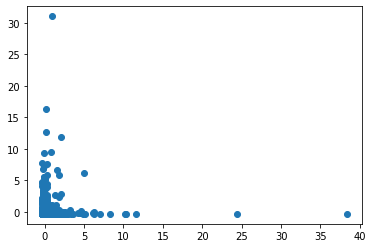

In [ ]:
plt.scatter(df['Area in square miles - Total area'].astype(float), df['Population'].astype(float))

**Boxplot of Percapita and povertyallages**

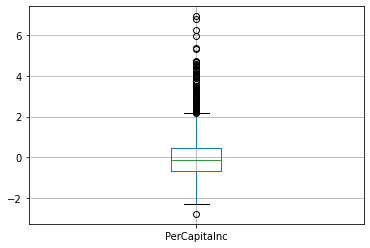

In [ ]:
df.boxplot('PerCapitaInc')

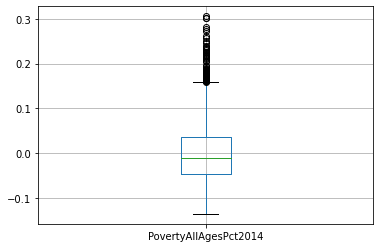

In [ ]:
df.boxplot('PovertyAllAgesPct2014')

**Histogram of religion**

(array([2.000e+00, 0.000e+00, 1.012e+03, 0.000e+00, 2.073e+03, 0.000e+00,
        3.000e+00, 0.000e+00, 2.400e+01, 3.100e+01]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

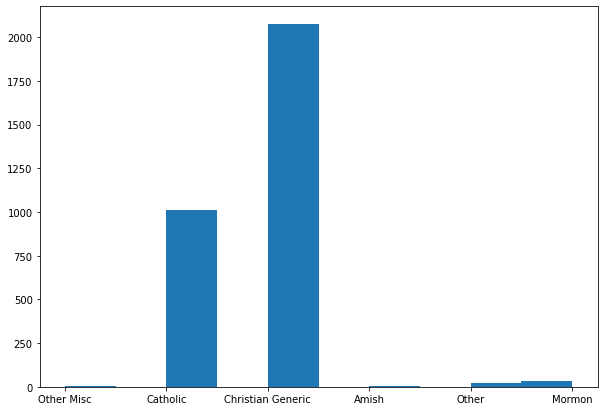

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['Religion'])

**histogram of ethnic male**

(array([3.025e+03, 0.000e+00, 0.000e+00, 9.900e+01, 0.000e+00, 0.000e+00,
        2.000e+01, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

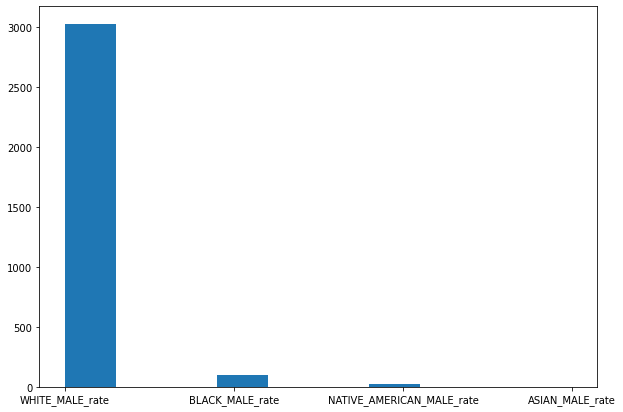

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['EthnicMale'])

**Histogram of Ethnic Female**

(array([3002.,    0.,    0.,    0.,    0.,  120.,    0.,    0.,    0.,
          23.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

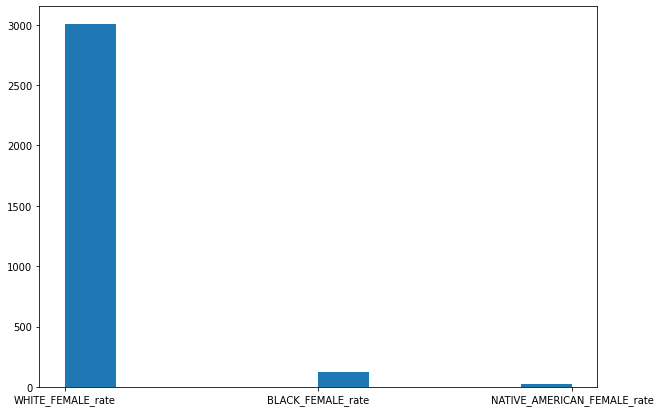

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['EthnicFemale'])

**Histogram of Education**

(array([1949.,    0.,    0.,  819.,    0.,    0.,  331.,    0.,    0.,
          46.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

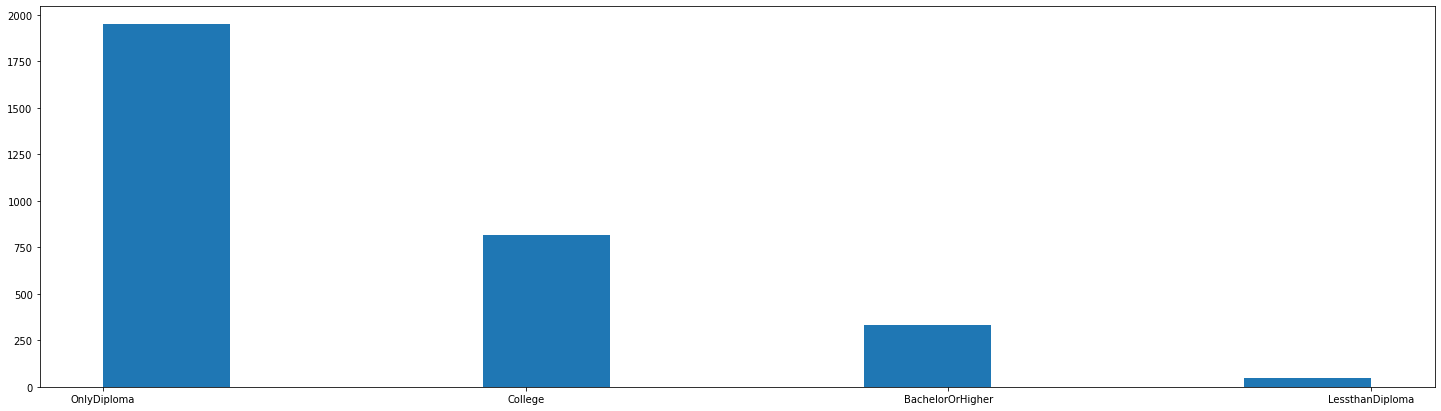

In [ ]:
fig, ax = plt.subplots(figsize =(25, 7))
ax.hist(df['Education'])

In [ ]:
df.drop(['WHITE_rate', 'BLACK_rate', 'NATIVE_AMERICAN_rate',
       'HAWAIIAN_PACIFIC_rate', 'MULTI_rate'], axis=1, inplace=True)

In [ ]:
len(df.columns)

22

**1.9 The label vector is Democrat feature as the democrat feature has only two unique values 0 and 1 and thus is binary in nature.**

In [ ]:
df.to_csv(r'elections_clean.csv')